In [1]:
import pyspark as ps
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark import SQLContext

spark = ps.sql.SparkSession.builder.master('local') \
    .appName('Homework 4').getOrCreate()

sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [2]:
path = 'nba_2017_pie.csv'
df = sqlContext.read.csv(path, header = True, 
                         quote = '"', sep = ",", 
                         inferSchema = True)
df.show(5)

+-----------------+----+---+---+---+---+----+------+------+------+----+------+---------+-----+-----+----+--------+----+----+----+------+----+
|           PLAYER|TEAM|AGE| GP|  W|  L| MIN|OFFRTG|DEFRTG|NETRTG|AST%|AST/TO|AST RATIO|OREB%|DREB%|REB%|TO RATIO|EFG%| TS%|USG%|  PACE| PIE|
+-----------------+----+---+---+---+---+----+------+------+------+----+------+---------+-----+-----+----+--------+----+----+----+------+----+
|Russell Westbrook| OKC| 28| 81| 46| 35|34.6| 107.9| 104.6|   3.3|54.3|  1.92|     23.4|  5.3| 27.9|16.7|    12.2|47.6|55.4|40.8|102.31|23.0|
| Boban Marjanovic| DET| 28| 35| 16| 19| 8.4| 104.3| 102.4|   1.9| 5.4|   0.9|      5.1| 16.6| 31.3|23.9|     5.7|54.5|60.6|24.8|  97.2|19.6|
|Demetrius Jackson| BOS| 22|  5|  1|  4| 3.4| 124.2| 117.8|   6.3|30.0|   0.0|     31.1|  9.1| 11.8|10.3|     0.0|87.5|75.3|17.2| 87.46|19.4|
|    Anthony Davis| NOP| 24| 75| 31| 44|36.1| 104.2| 102.5|   1.7|11.0|  0.87|      7.3|  6.7| 26.9|17.0|     8.4|51.8|58.0|32.6|100.19|19.2|
|     

In [3]:
df.printSchema()

root
 |-- PLAYER: string (nullable = true)
 |-- TEAM: string (nullable = true)
 |-- AGE: integer (nullable = true)
 |-- GP: integer (nullable = true)
 |-- W: integer (nullable = true)
 |-- L: integer (nullable = true)
 |-- MIN: double (nullable = true)
 |-- OFFRTG: double (nullable = true)
 |-- DEFRTG: double (nullable = true)
 |-- NETRTG: double (nullable = true)
 |-- AST%: double (nullable = true)
 |-- AST/TO: double (nullable = true)
 |-- AST RATIO: double (nullable = true)
 |-- OREB%: double (nullable = true)
 |-- DREB%: double (nullable = true)
 |-- REB%: double (nullable = true)
 |-- TO RATIO: double (nullable = true)
 |-- EFG%: double (nullable = true)
 |-- TS%: double (nullable = true)
 |-- USG%: double (nullable = true)
 |-- PACE: double (nullable = true)
 |-- PIE: double (nullable = true)



In [4]:
df.count()

486

In [5]:
df.select('TEAM').distinct().count()

30

In [6]:
df.select('TEAM').distinct().show(5)

+----+
|TEAM|
+----+
| GSW|
| DET|
| LAL|
| NYK|
| LAC|
+----+
only showing top 5 rows



In [7]:
df_NOP = df[df['TEAM'] == 'NOP']
df_NOP.count()

17

In [8]:
def print_quantiles(df, feature):
    min_value = df_NOP.select(feature).rdd.min()[0]
    max_value = df_NOP.select(feature).rdd.max()[0]
    quantiles = df_NOP.approxQuantile(feature, [0.25, 0.5, 0.75], 0)
    
    print('min {}: {}'.format(feature, min_value))
    print('max {}: {}'.format(feature, max_value))
    print('median {}: {}'.format(feature, quantiles[1]))
    print('lower quartile {}: {}'.format(feature, quantiles[0]))
    print('upper quartile {}: {}'.format(feature, quantiles[2]))

In [9]:
print_quantiles(df_NOP, 'W')

min W: 1
max W: 34
median W: 15.0
lower quartile W: 9.0
upper quartile W: 30.0


In [10]:
print_quantiles(df_NOP, 'OFFRTG')

min OFFRTG: 88.1
max OFFRTG: 112.7
median OFFRTG: 103.7
lower quartile OFFRTG: 99.4
upper quartile OFFRTG: 104.3


In [11]:
print_quantiles(df_NOP, 'DEFRTG')

min DEFRTG: 102.4
max DEFRTG: 116.5
median DEFRTG: 106.1
lower quartile DEFRTG: 103.5
upper quartile DEFRTG: 109.5


In [12]:
print_quantiles(df_NOP, 'PIE')

min PIE: 2.0
max PIE: 19.2
median PIE: 7.3
lower quartile PIE: 5.8
upper quartile PIE: 10.2


In [13]:
df_NOP = df_NOP.toPandas()

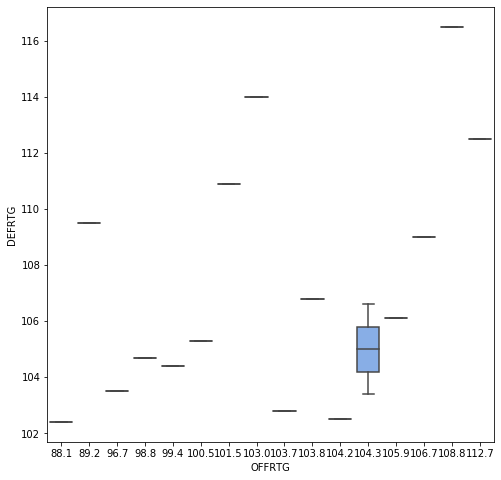

In [14]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = df_NOP['OFFRTG'], y = df_NOP['DEFRTG'])

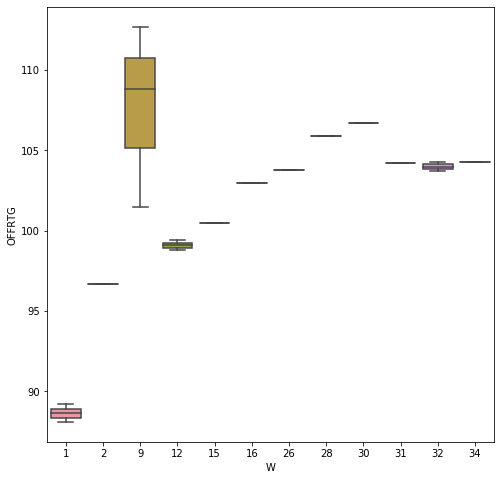

In [15]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = df_NOP['W'], y = df_NOP['OFFRTG'])

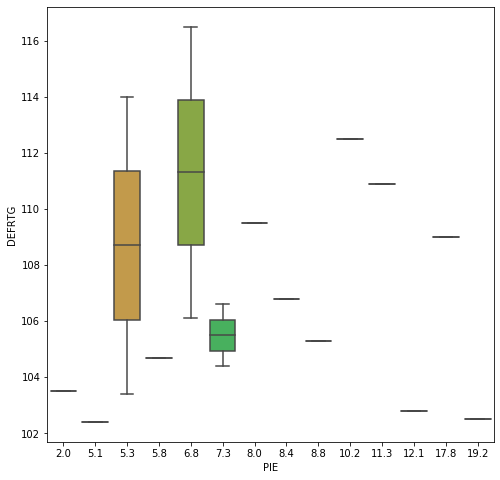

In [16]:
plt.figure(figsize = (8, 8))
sns.boxplot(x = df_NOP['PIE'], y = df_NOP['DEFRTG'])